In [173]:
import torch
from torch.nn import BCEWithLogitsLoss
from torch.optim import SGD

In [174]:
x = torch.tensor([[1,2],[3,4]], dtype=torch.float32, requires_grad=True)
x

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [175]:
w = torch.randn(5, requires_grad=True)

In [176]:
w

tensor([-0.1100, -0.4355,  0.2145, -0.8164, -0.4578], requires_grad=True)

In [177]:
x = torch.ones(3, 5)
x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [178]:
y = torch.zeros(3)
y

tensor([0., 0., 0.])

In [179]:
h = x @ w

In [180]:
loss_fn = BCEWithLogitsLoss()
loss = loss_fn(h, y)

In [181]:
loss

tensor(0.1830, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [182]:
loss.backward()

In [183]:
w.grad

tensor([0.1673, 0.1673, 0.1673, 0.1673, 0.1673])

In [184]:
optimizer = SGD([w], lr=0.1)

In [185]:
optimizer.step()

In [186]:
w

tensor([-0.1267, -0.4523,  0.1978, -0.8331, -0.4745], requires_grad=True)

In [187]:
# ne zelimo da sabiramo sve gradijente
optimizer.zero_grad()

In [188]:
from sklearn.datasets import load_breast_cancer

In [189]:
X, y = load_breast_cancer(return_X_y=True)

In [190]:
X.shape

(569, 30)

In [191]:
y.shape

(569,)

In [192]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [195]:
X_train.shape

(455, 30)

In [196]:
X_test.shape

(114, 30)

In [197]:
X_train[0]

array([1.171e+01, 1.719e+01, 7.468e+01, 4.203e+02, 9.774e-02, 6.141e-02,
       3.809e-02, 3.239e-02, 1.516e-01, 6.095e-02, 2.451e-01, 7.655e-01,
       1.742e+00, 1.786e+01, 6.905e-03, 8.704e-03, 1.978e-02, 1.185e-02,
       1.897e-02, 1.671e-03, 1.301e+01, 2.139e+01, 8.442e+01, 5.215e+02,
       1.323e-01, 1.040e-01, 1.521e-01, 1.099e-01, 2.572e-01, 7.097e-02])

In [198]:
from sklearn.preprocessing import StandardScaler

In [199]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [200]:
X_train[0]

array([-0.70762788, -0.48635109, -0.731951  , -0.6835778 ,  0.09131195,
       -0.82278265, -0.65542332, -0.45274578, -1.06319373, -0.23837463,
       -0.56629102, -0.83023657, -0.54732194, -0.48916433, -0.03535761,
       -0.93876866, -0.44161995,  0.01544505, -0.14847102, -0.87841131,
       -0.6942112 , -0.69199558, -0.69907981, -0.64722072, -0.02799527,
       -0.97441893, -0.59678424, -0.11208945, -0.55401189, -0.72220145])

In [201]:
import torch
from torch.utils.data import Dataset, DataLoader

In [202]:
class OurDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

In [203]:
train_dataset = OurDataset(X_train, y_train)
len(train_dataset)

455

In [204]:
train_dataset[0]

(tensor([-0.7076, -0.4864, -0.7320, -0.6836,  0.0913, -0.8228, -0.6554, -0.4527,
         -1.0632, -0.2384, -0.5663, -0.8302, -0.5473, -0.4892, -0.0354, -0.9388,
         -0.4416,  0.0154, -0.1485, -0.8784, -0.6942, -0.6920, -0.6991, -0.6472,
         -0.0280, -0.9744, -0.5968, -0.1121, -0.5540, -0.7222]),
 tensor(1.))

In [205]:
test_dataset = OurDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=16)

In [206]:
train_dataloader = DataLoader(train_dataset, batch_size=16)
for batch_x, batch_y in train_dataloader:
    print(batch_x.shape)
    print(batch_y.shape)
    break

torch.Size([16, 30])
torch.Size([16])


In [207]:
from torch import nn

In [208]:
class Net(nn.Module):
    def __init__(self):

        super().__init__()

        # self.net = nn.Sequential([layer1, layer2])

        self.layer1 = nn.Linear(30, 10)
        self.layer2 = nn.Linear(10, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        # g(Wx+b)
        h1 = self.activation(self.layer1(x))
        h2 = self.layer2(h1)
        return h2

In [209]:
loss_fn = BCEWithLogitsLoss()
model = Net()
optimizer = SGD(model.parameters(), lr=0.1)

In [237]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    model.train()
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        preds = model(X)
        loss = loss_fn(preds, y)

        # backpropagation - racunanje gradijenta
        loss.backward()
        # x_new = x - lr * grad
        optimizer.step()
        # necemo da sabiramo sve gradijente
        optimizer.zero_grad()

In [238]:
def test_loop(dataloader, model, loss_fn, device):
    model.eval()
    with torch.no_grad():
        total_loss = 0
        num_same = 0
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            loss = loss_fn(outputs, y)
            total_loss += loss.item()
            # accuracy
            # preds = outputs > 0 # dve klase
            _, indices = torch.max(outputs, 1) # vise klasa - maks po dimenziji 1
                                               # jer je outputs.shape = (batch_size, num_classes)
            num_same += sum(indices == y).item()
        print(total_loss)
        print(num_same / len(dataloader.dataset))

In [239]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
num_epochs = 1
for epoch in range(num_epochs):
    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    test_loop(test_dataloader, model, loss_fn, device)

2365.6479723641078
0.9302


In [213]:
from torchvision import datasets, transforms

In [214]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [215]:
from matplotlib import pyplot as plt

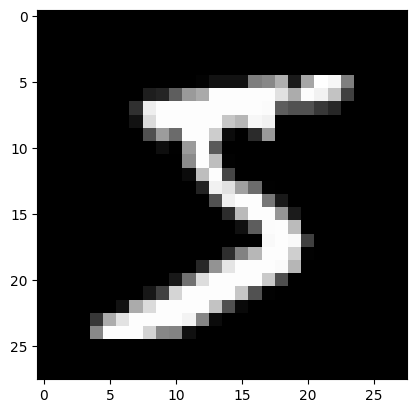

In [216]:
img, label = train_dataset[0]
# print(img)
plt.imshow(img.numpy().reshape(28,28), cmap='gray')

In [232]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(28*28, 32)
        self.fc2 = nn.Linear(32, 64)
        # self.dropout = nn.Dropout(p=0.3)
        # self.norm = nn.BatchNorm1d() # (x - m) / s
        self.fc3 = nn.Linear(64, 10)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = nn.Flatten()(x)
        for layer in [self.fc1, self.fc2]:
            x = self.activation(layer(x))
            x = self.dropout(x)
        return (self.fc3(x))

In [233]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Net().to(device)

In [234]:
from torch import optim

In [235]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
# optim.Adam()

In [236]:
train_loader = DataLoader(train_dataset, batch_size=17)
test_loader = DataLoader(test_dataset, batch_size=17)

In [222]:
epochs = 1
for epoch in range(epochs):
    train_loop(train_loader, model, loss_fn, optimizer, device)
    test_loop(test_loader, model, loss_fn, device)

117.25367748353165
0.9384


In [223]:
import torch.nn.functional as F

In [224]:
class ConvNet(nn.Module):

    def __init__(self):
        super().__init__()

        self.layer1 = nn.Conv2d(1, 16, 3)
        self.layer2 = nn.Conv2d(16, 32, 3)
        self.pool = nn.MaxPool2d(2)
        self.flatten = nn.Flatten(start_dim=1)
        self.fc = nn.Linear(800, 10)
        # nn.LazyLinear(10)

    def forward(self, x):
        # print(x.shape)
        x = F.relu(self.layer1(x))
        # print(x.shape)
        x = self.pool(x)
        # print(x.shape)
        x = F.relu(self.layer2(x))
        # print(x.shape)
        x = self.pool(x)
        # print(x.shape)
        x = self.flatten(x)
        # print(x.shape)
        return self.fc(x)

In [225]:
model = ConvNet()

In [226]:
img, label = train_dataset[0]
img.shape

torch.Size([1, 28, 28])

In [227]:
model(img.reshape(1,1,28,28))

tensor([[-0.1086,  0.0031, -0.0154, -0.0821,  0.1234,  0.0187, -0.1030,  0.0312,
         -0.1553, -0.0221]], grad_fn=<AddmmBackward0>)

In [228]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [229]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
model.to(device)
num_epochs = 1
for epoch in range(num_epochs):
    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    test_loop(test_dataloader, model, loss_fn, device)

25.794946392066777
0.9732


In [230]:
model.to(device)

ConvNet(
  (layer1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (layer2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=800, out_features=10, bias=True)
)

torch.Size([1, 1, 28, 28])
Predicted class: 7
tensor([[ -4.9580,  -7.2806,   2.7286,   1.4263, -12.8983,  -6.3123, -16.1764,
          13.4022,  -5.5099,  -0.9677]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
Real class: tensor([7], device='cuda:0')
torch.Size([1, 1, 28, 28])
Predicted class: 2
tensor([[ -2.5502,   0.2747,  10.5296,  -2.7403, -16.3968,  -6.7950,   0.0309,
         -15.1809,  -3.1931, -12.5885]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
Real class: tensor([2], device='cuda:0')
torch.Size([1, 1, 28, 28])
Predicted class: 1
tensor([[-4.3287,  6.7255, -1.8440, -3.1755,  0.8300, -4.3594, -1.3136, -0.5137,
         -2.0135, -3.4589]], device='cuda:0', grad_fn=<AddmmBackward0>)
Real class: tensor([1], device='cuda:0')
torch.Size([1, 1, 28, 28])
Predicted class: 0
tensor([[  8.0465, -16.0109,  -1.9482,  -7.3972,  -8.8423,  -4.0007,  -0.2864,
          -7.0427,  -6.5692,  -2.0072]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
Real class: tensor([0], device

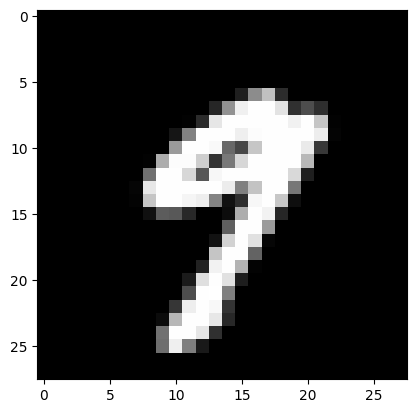

In [231]:
test_dataloader = DataLoader(test_dataset, batch_size=1)

for i, (X, y) in enumerate(test_dataloader):
    print(X.shape)
    X, y = X.to(device), y.to(device)
    preds = model(X)
    print(f'Predicted class: {torch.argmax(preds)}')
    print(preds)
    print(f'Real class: {y}')
    plt.imshow(X.cpu().numpy().reshape(28,28), cmap='gray')
    if i == 20:
        break